## Final Project - Audio Visualization

### By Rinki and Zohaib 

#### Project Introduction
* Converting values of an audio's spectrogram into decibels
* Creating a visualization of these decibel values for the duration of the audio's time

### TODO
  
  - get familiar with audio visualization apis and libraries
    - https://github.com/willianjusten/awesome-audio-visualization

### Reading in Audio

sample rate = 16000 (Hz)
number of samples = 447124


STFT shape: (513, 872)
time in seconds:  27.94525

[[ 9.72803396e-02+0.00000000e+00j  6.54722497e+00+0.00000000e+00j
  -5.88638989e+00+0.00000000e+00j ...  1.51363805e-04+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 7.85574857e-02+5.74444631e-02j -6.83087865e+00+1.49149433e+00j
   5.91187845e+00+5.31920288e+00j ...  1.28592873e-04-7.70027149e-05j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 2.95496367e-02+9.28829109e-02j  3.06609550e+00-3.70541799e+00j
  -3.70159380e+00-9.24552358e+00j ...  6.84091696e-05-1.28457607e-04j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 1.66305658e-06+4.38165481e-07j  1.01730297e-05+1.25657202e-05j
  -2.54654732e-05+1.18183467e-05j ... -6.21199043e-11-1.29599093e-10j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.45044972e-06+2.45793624e-07j -8.64523946e-06-7.79273709e-06j
  -8.36856788e-08-1.42096468e-05j ... -1.11688253e-10-7.27924883e-

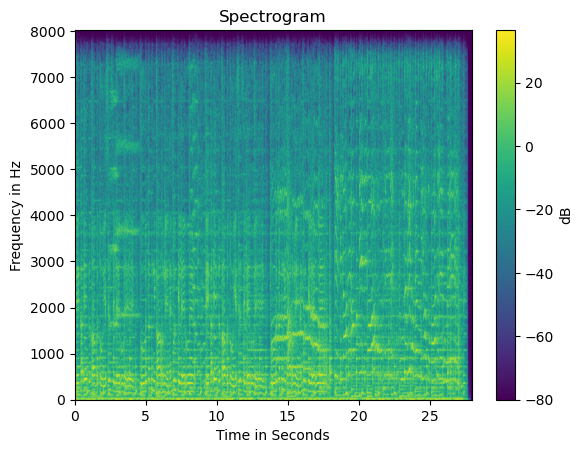

In [7]:
import numpy as np
import math
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

sr = 16000
N = 1024 # frame size (or DFT size or FFT size); N is usually a power of 2 (e.g., 2^10 = 1024).
hop = int(N/2) # hop size (usually half of the frame size)

## Read audio
x, sr = librosa.load('audio1.wav', sr = sr) # read the audio using 8kHz sample rate

print("sample rate =", sr, "(Hz)")
print("number of samples =", len(x))
ipd.display(ipd.Audio(x, rate=sr))

## STFT shape
frames = math.floor( (len(x)-N) / hop ) + 1 # the total number of frames
STFT = np.zeros((int(N/2)+1, frames), dtype='complex') # the STFT result will be a "int(N/2)+1 by frames" matrix
print("STFT shape:", STFT.shape)

hann = 0.5 * ( 1 - np.cos(2*np.pi*np.arange(N)/N) ) # our Hann window

## Fill in values
for frame in range(frames): # for each frame index
    chunk = x[frame*hop : frame*hop + N] * hann # get the samples in this frame multiplied by the hanning window
    X = np.fft.fft(chunk) # contains N complex numbers
    STFT[:, frame] = X[:int(N/2)+1] # we only need about half of them because of symmetry of DFT
    
print("time in seconds: ", len(x)/sr)

print("")

print(STFT)


## Plot the spectrogram
spect = np.abs(STFT) # complex numbers --> abs values
plt.imshow(20*np.log10(spect+0.0001), origin='lower', aspect='auto', extent= [0, len(x)/sr, 0, (N//2 +1)*sr/N])
plt.title('Spectrogram')
plt.xlabel('Time in Seconds')
plt.ylabel('Frequency in Hz')
plt.colorbar(label = "dB")
plt.show()

### Applying STFT Function